## Partie 5 : Résolution Numérique des Équations Différentielles (Modèle SIRD)
Dans cette section, nous résolvons numériquement les équations différentielles du modèle SIRD pour simuler la dynamique de propagation d'un virus et comparer les résultats avec des données réelles.

### Objectifs :
1. **Résoudre les équations différentielles du modèle SIRD** avec les méthodes d'Euler et Runge-Kutta d'ordre 4 (RK4).
2. **Valider les simulations** en les comparant aux données réelles de la France.
3. **Analyser les erreurs** (MAE/RMSE) pour évaluer la précision des méthodes numériques.
4. **Visualiser la dynamique complète** (S, I, R, D) de l'épidémie.

### Modèle Mathématique SIRD :
Les équations différentielles gouvernant le modèle sont :

\begin{cases}
\frac{dS}{dt} = -r S I \\
\frac{dI}{dt} = r S I - (a + b)I \\
\frac{dR}{dt} = a I \\
\frac{dD}{dt} = b I
\end{cases}

où :
- $r$: Taux de contagion  
- $a$: Taux de guérison  
- $b$: Taux de mortalité  
- $R_0 = \frac{r}{a + b}$ : Nombre de reproduction de base

In [10]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np

# importation des modules internes du projet
from src.analysis import estimer_parametres_rab
from src.analysis.equations_differentielles.simulateur_sird import SimulateurSIRD
from src.data import DataPipeline

In [11]:
# Initialisation du pipeline de données pour la France
pipeline = DataPipeline(country="France")
df = pipeline.run()
population = pipeline.population  # Population totale pour conversion absolue

In [12]:
# Estimation des paramètres épidémiologiques (r, a, b)
params = estimer_parametres_rab(df)
R0 = params["r"] / (params["a"] + params["b"])

print(f"Paramètres estimés : {params}")
print(f"Nombre de reproduction de base R0 = {R0:.2f}")

Paramètres estimés : {'r': 0.09744475611400083, 'a': 0.07112088679113882, 'b': 0.00030768463743252594}
Nombre de reproduction de base R0 = 1.36


### Résolution des Équations Différentielles

In [13]:
# Comparaison des méthodes numériques (Euler vs RK4)
simulateur = SimulateurSIRD(params)

# Simulation avec RK4
result_rk4 = simulateur.resoudre(
    df=df,
    t_max=len(df),  # Durée égale aux données réelles
    dt=1.0,
    methode="rk4"
)

# Simulation avec Euler
result_euler = simulateur.resoudre(
    df=df,
    t_max=len(df),
    dt=1.0,
    methode="euler"
)

### Comparaison des Simulations avec les Données Réelles

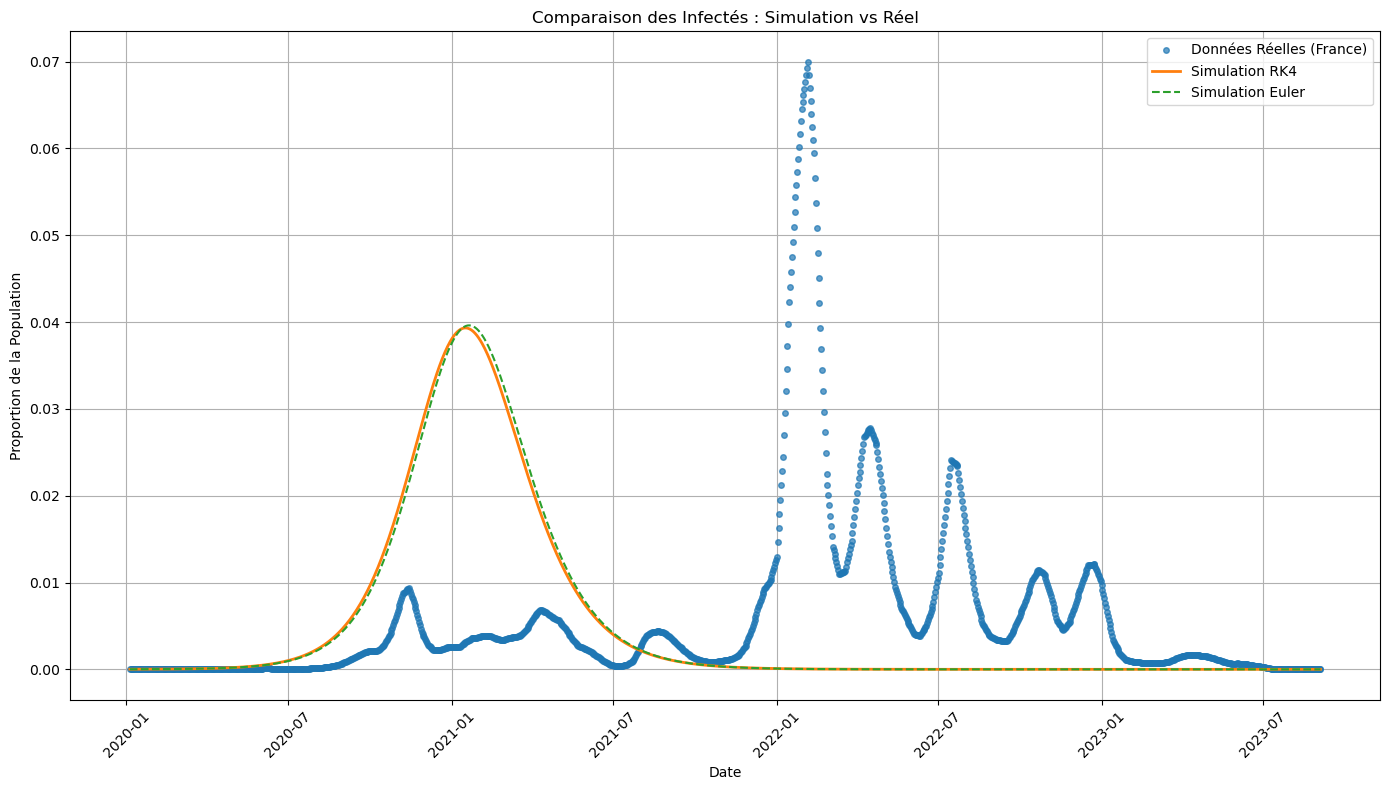

In [14]:
# Focus sur les infectés (I)
plt.figure(figsize=(14, 8))
plt.plot(df["date"], df["I"], 'o', label='Données Réelles (France)', markersize=4, alpha=0.7)
plt.plot(df["date"], result_rk4["I"][:len(df)], label='Simulation RK4', linewidth=2)
plt.plot(df["date"], result_euler["I"][:len(df)], label='Simulation Euler', linestyle='--')
plt.title("Comparaison des Infectés : Simulation vs Réel")
plt.xlabel("Date")
plt.ylabel("Proportion de la Population")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Analyse des Erreurs (RK4)

In [19]:
# Calcul des métriques de précision
simulated_I_rk4 = result_rk4["I"][:len(df)]

# Erreur absolue moyenne (MAE)
mae_rk4 = np.mean(np.abs(df["I"] - simulated_I_rk4))

# Erreur quadratique moyenne (RMSE)
rmse_rk4 = np.sqrt(np.mean(np.square(df["I"] - simulated_I_rk4)))

print("\nPerformance de la méthode RK4 :")
print(f"- MAE  : {mae_rk4:.8f} (erreur moyenne absolue)")
print(f"- RMSE : {rmse_rk4:.8f} (erreur quadratique moyenne)")


Performance de la méthode RK4 :
- MAE  : 0.00916582 (erreur moyenne absolue)
- RMSE : 0.01560224 (erreur quadratique moyenne)


### Analyse des Erreurs (Euler)

In [18]:
# Calcul des métriques de précision
simulated_I_euler = result_euler["I"][:len(df)]

# Erreur absolue moyenne (MAE)
mae_euler = np.mean(np.abs(df["I"] - simulated_I_euler))

# Erreur quadratique moyenne (RMSE)
rmse_euler = np.sqrt(np.mean(np.square(df["I"] - simulated_I_euler)))

print("\nPerformance de la méthode Euler :")
print(f"- MAE  : {mae_euler:.8f} (erreur moyenne absolue)")
print(f"- RMSE : {rmse_euler:.8f} (erreur quadratique moyenne)")


Performance de la méthode Euler :
- MAE  : 0.00917819 (erreur moyenne absolue)
- RMSE : 0.01564152 (erreur quadratique moyenne)


### Dynamique Complète de l'Épidémie (Méthode RK4)

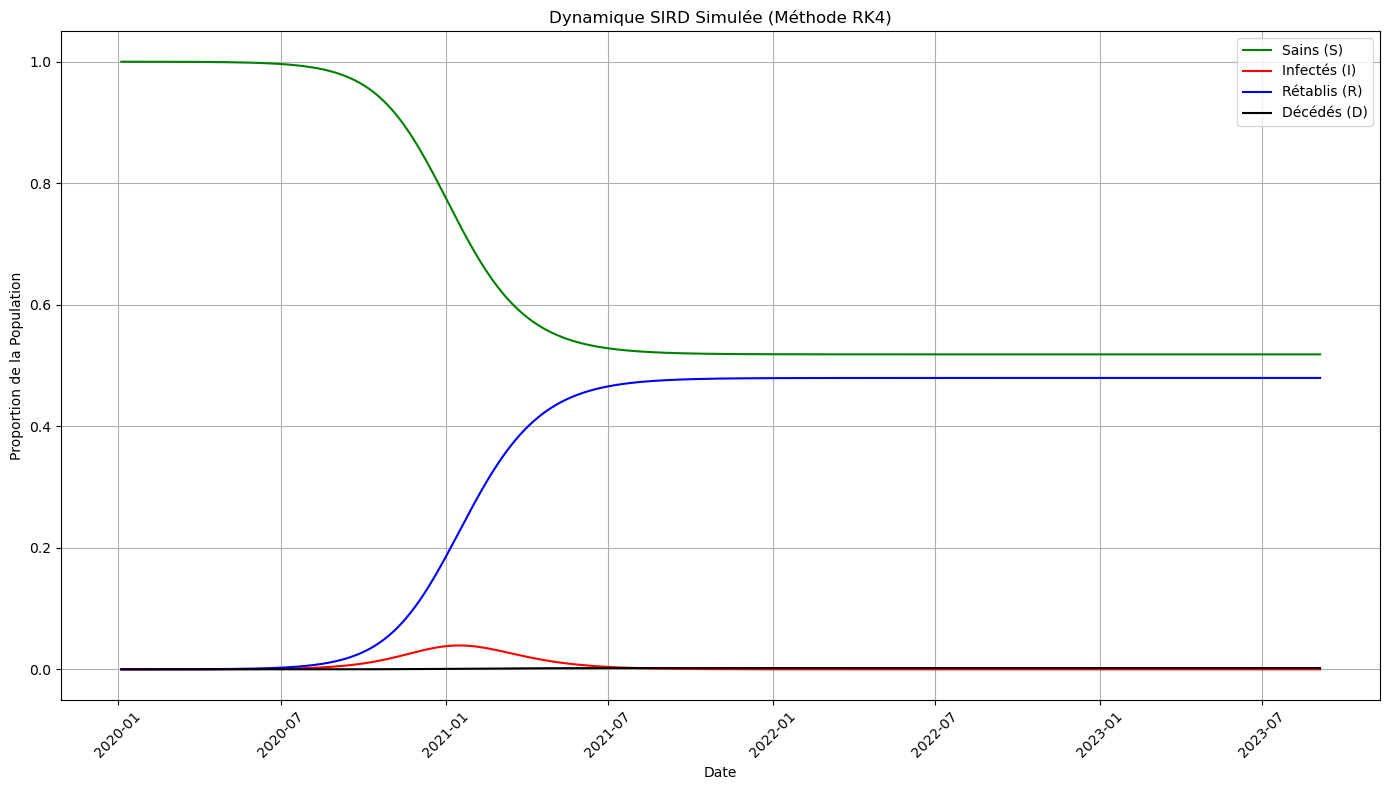

In [17]:
plt.figure(figsize=(14, 8))
plt.plot(df["date"], result_rk4["S"][:len(df)], label="Sains (S)", color="green")
plt.plot(df["date"], result_rk4["I"][:len(df)], label="Infectés (I)", color="red")
plt.plot(df["date"], result_rk4["R"][:len(df)], label="Rétablis (R)", color="blue")
plt.plot(df["date"], result_rk4["D"][:len(df)], label="Décédés (D)", color="black")
plt.title("Dynamique SIRD Simulée (Méthode RK4)")
plt.xlabel("Date")
plt.ylabel("Proportion de la Population")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()